In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
#pack_cuda._ensure_initialized()


local


In [2]:
%load_ext pyinstrument

KeyboardInterrupt: 

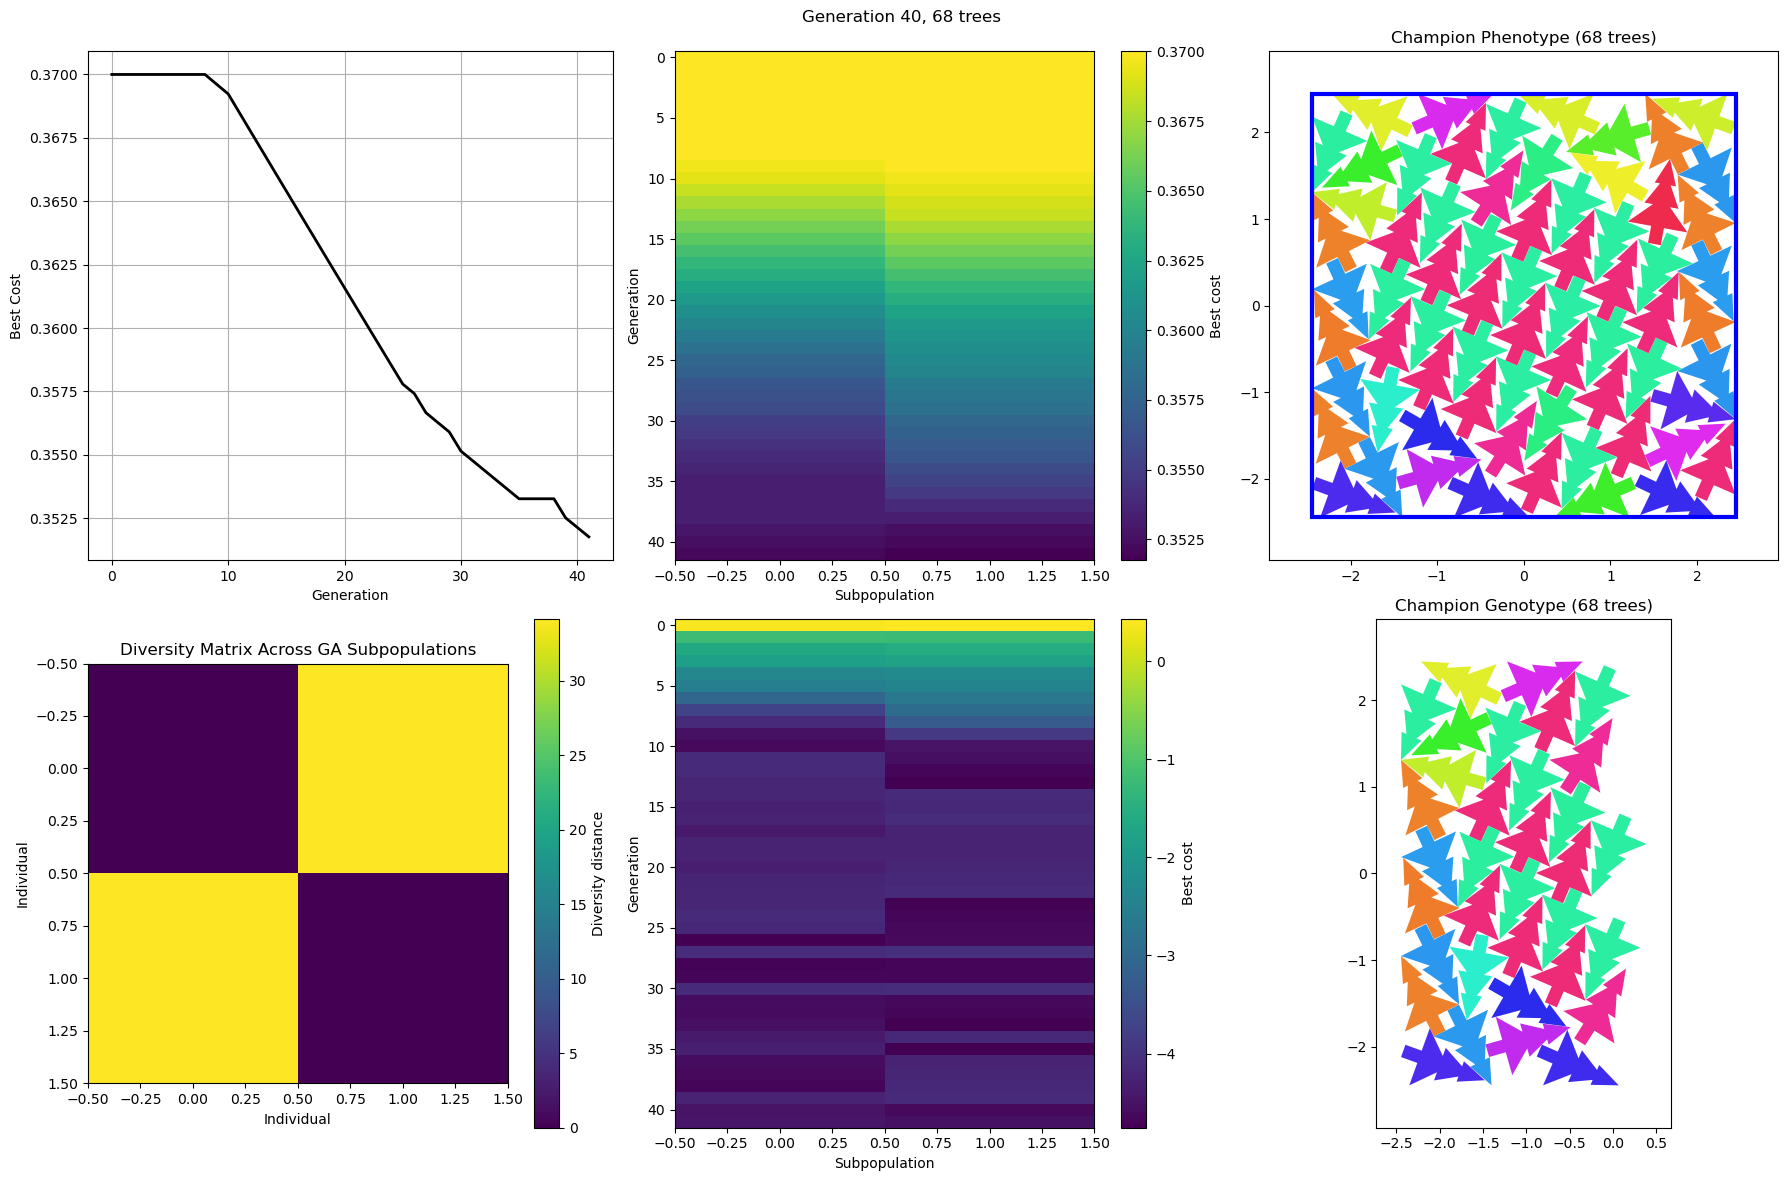

In [3]:
#%%pyinstrument
#kgs.profiling=True
# %matplotlib widget
#kgs.enable_module_profiling(kgs)
import pack_ga3
import pack_runner
importlib.reload(pack_ga3)
fastMode = False
kgs.debugging_mode = 2

for seed in range(1):

    runner = pack_ga3.baseline_symmetry_180()

    ref_sol = kgs.dill_load(kgs.temp_dir + '/controller_runs/done/ga_N68_seed507_done.pickle')
    runner.ga.ga_base.initializer.ref_sol = ref_sol.ga.champions[0].genotype
    runner.ga.ga_base.initializer.ref_N = 20
    runner.ga.N = 2

    runner.ga.ga_base.N_trees_to_do = 68
    runner.diagnostic_plot = True
    runner.seed = seed
    runner.plot_every = 10
    #runner.filter_before_rough = 1.

    runner.run()